# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80_run6/result-lstm-tcp80-hl2-seq4-do0.2-oov2500-part_10_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_10_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.51-49124-172.217.5.228-80-tcp,0.036145,0,1,1,60200.984598,0,1,1
1,192.168.10.17-56223-23.50.75.27-80-tcp,0.032483,0,1,1,7714.892272,0,1,1
2,192.168.10.5-51348-8.43.72.112-80-tcp,0.127313,0,1,1,306184.604306,1,1,1
3,192.168.10.5-58547-178.255.83.1-80-tcp,0.034642,0,1,1,17407.118881,0,1,1
4,192.168.10.8-51474-52.30.16.102-80-tcp,0.118799,0,1,1,259870.249344,0,1,1


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.51-49124-172.217.5.228-80-tcp,BENIGN
1,192.168.10.17-56223-23.50.75.27-80-tcp,BENIGN
2,192.168.10.5-51348-8.43.72.112-80-tcp,BENIGN
3,192.168.10.5-58547-178.255.83.1-80-tcp,BENIGN
4,192.168.10.8-51474-52.30.16.102-80-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22762
1         6287
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22762
1         6287
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           22934
1            6115
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0         192.168.10.51-49124-172.217.5.228-80-tcp
1           192.168.10.17-56223-23.50.75.27-80-tcp
2            192.168.10.5-51348-8.43.72.112-80-tcp
3           192.168.10.5-58547-178.255.83.1-80-tcp
4           192.168.10.8-51474-52.30.16.102-80-tcp
                           ...                    
29044     192.168.10.16-59936-50.63.243.230-80-tcp
29045    192.168.10.12-50182-104.97.125.186-80-tcp
29046      192.168.10.5-56476-23.208.165.24-80-tcp
29047       192.168.10.8-51520-69.16.175.42-80-tcp
29048      192.168.10.19-47356-23.60.139.27-80-tcp
Name: id, Length: 29049, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0         192.168.10.51-49124-172.217.5.228-80-tcp
1           192.168.10.17-56223-23.50.75.27-80-tcp
2            192.168.10.5-51348-8.43.72.112-80-tcp
3           192.168.10.5-58547-178.255.83.1-80-tcp
4           192.168.10.8-51474-52.30.16.102-80-tcp
                           ...                    
29044     192.168.10.16-59936-50.63.243.230-80-tcp
29045    192.168.10.12-50182-104.97.125.186-80-tcp
29046      192.168.10.5-56476-23.208.165.24-80-tcp
29047       192.168.10.8-51520-69.16.175.42-80-tcp
29048      192.168.10.19-47356-23.60.139.27-80-tcp
Name: ID, Length: 29049, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
5312,172.16.0.1-45126-192.168.10.50-80-tcp,0.635854,0,0,0,220471.575071,0,0,0,1
5313,172.16.0.1-45126-192.168.10.50-80-tcp,0.635854,0,0,0,220471.575071,0,0,0,1
5314,172.16.0.1-54422-192.168.10.50-80-tcp,0.531034,0,0,0,130358.954545,0,0,0,1
5315,172.16.0.1-54422-192.168.10.50-80-tcp,0.531034,0,0,0,130358.954545,0,0,0,1
5316,172.16.0.1-54422-192.168.10.50-80-tcp,0.531034,0,0,0,130358.954545,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
67134,172.16.0.1-50392-192.168.10.50-80-tcp,0.503049,0,0,0,177095.225309,0,0,0,1
67135,172.16.0.1-55406-192.168.10.50-80-tcp,0.521053,0,0,0,162972.750000,0,0,0,1
67136,172.16.0.1-55406-192.168.10.50-80-tcp,0.521053,0,0,0,162972.750000,0,0,0,1
67137,172.16.0.1-55406-192.168.10.50-80-tcp,0.521053,0,0,0,162972.750000,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-49124-172.217.5.228-80-tcp,0.036145,0,1,1,60200.984598,0,1,1,0
1,192.168.10.17-56223-23.50.75.27-80-tcp,0.032483,0,1,1,7714.892272,0,1,1,0
2,192.168.10.5-51348-8.43.72.112-80-tcp,0.127313,0,1,1,306184.604306,1,1,1,0
3,192.168.10.5-58547-178.255.83.1-80-tcp,0.034642,0,1,1,17407.118881,0,1,1,0
4,192.168.10.8-51474-52.30.16.102-80-tcp,0.118799,0,1,1,259870.249344,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70612,192.168.10.16-59936-50.63.243.230-80-tcp,0.049296,0,1,1,23637.793839,0,1,1,0
70613,192.168.10.12-50182-104.97.125.186-80-tcp,0.047771,0,1,1,42858.728145,0,1,1,0
70614,192.168.10.5-56476-23.208.165.24-80-tcp,0.063084,0,1,1,92517.235849,0,1,0,0
70615,192.168.10.8-51520-69.16.175.42-80-tcp,0.065831,0,1,1,98493.989507,0,1,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-49124-172.217.5.228-80-tcp,0.036145,0,1,1,60200.984598,0,1,1,0
1,192.168.10.17-56223-23.50.75.27-80-tcp,0.032483,0,1,1,7714.892272,0,1,1,0
2,192.168.10.5-51348-8.43.72.112-80-tcp,0.127313,0,1,1,306184.604306,1,1,1,0
3,192.168.10.5-58547-178.255.83.1-80-tcp,0.034642,0,1,1,17407.118881,0,1,1,0
4,192.168.10.8-51474-52.30.16.102-80-tcp,0.118799,0,1,1,259870.249344,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70612,192.168.10.16-59936-50.63.243.230-80-tcp,0.049296,0,1,1,23637.793839,0,1,1,0
70613,192.168.10.12-50182-104.97.125.186-80-tcp,0.047771,0,1,1,42858.728145,0,1,1,0
70614,192.168.10.5-56476-23.208.165.24-80-tcp,0.063084,0,1,1,92517.235849,0,1,0,0
70615,192.168.10.8-51520-69.16.175.42-80-tcp,0.065831,0,1,1,98493.989507,0,1,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        61827
0         8790
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
70612,1
70613,1
70614,1
70615,1


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.0
Recall-Binary-b_iqr: 0.05057660892490336
Recall-Binary-b_zscore: 0.04365406699338477
Recall-Floating-f_mean: 0.014847881993303896
Recall-Floating-f_iqr: 0.042182218124767495
Recall-Floating-f_zscore: 0.02332314361039675


### Confussion Matrix

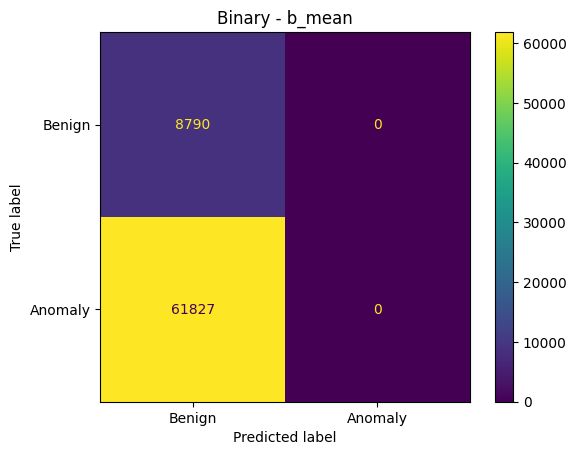

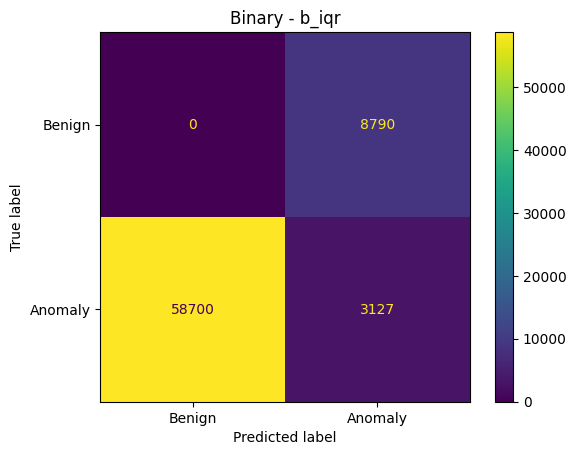

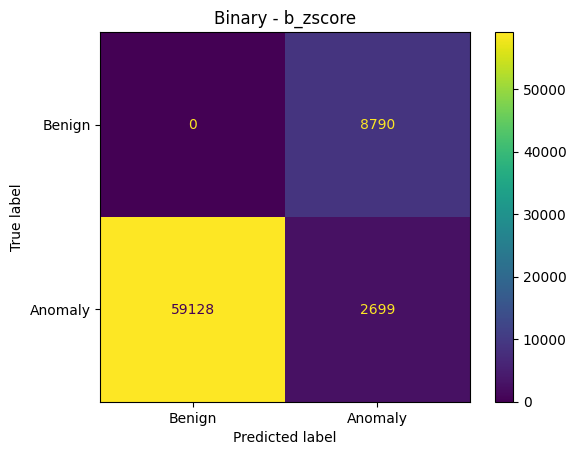

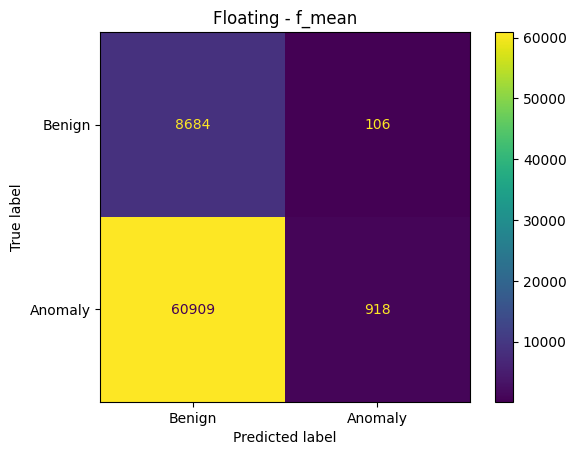

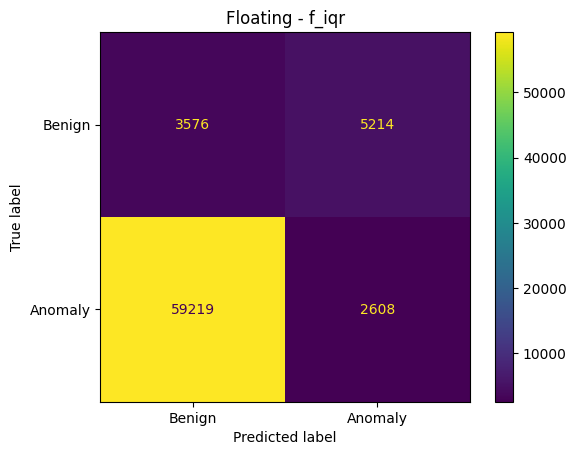

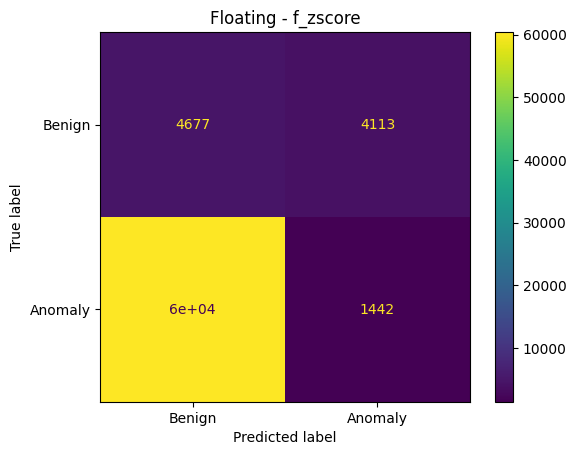

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.0
F2-Binary-b_iqr: 0.06031439868839811
F2-Binary-b_zscore: 0.05214511760182691
F2-Floating-f_mean: 0.018483320715815925
F2-Floating-f_iqr: 0.05111119821267589
F2-Floating-f_zscore: 0.028513463812420165


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 1.0
FPR-Binary-b_zscore: 1.0
FPR-Floating-f_mean: 0.012059158134243459
FPR-Floating-f_iqr: 0.5931740614334471
FPR-Floating-f_zscore: 0.46791808873720137


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.12447427673223162
Accuracy-Binary-b_iqr: 0.04428112210940709
Accuracy-Binary-b_zscore: 0.038220258577962817
Accuracy-Floating-f_mean: 0.13597292436665392
Accuracy-Floating-f_iqr: 0.08757098149170879
Accuracy-Floating-f_zscore: 0.08665052324511095


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.000000,0.000000,0.000000,0.124474
b_iqr,0.050577,0.060314,1.000000,0.044281
b_zscore,0.043654,0.052145,1.000000,0.038220
f_mean,0.014848,0.018483,0.012059,0.135973
f_iqr,0.042182,0.051111,0.593174,0.087571
f_zscore,0.023323,0.028513,0.467918,0.086651


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl